In [12]:
import pandas as pd 
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

MSE =  0.001618267605425848
MAE =  0.036143692813288664


C:\Users\yulas\.conda\envs\fedot_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\yulas\.conda\envs\fedot_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\yulas\.conda\envs\fedot_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


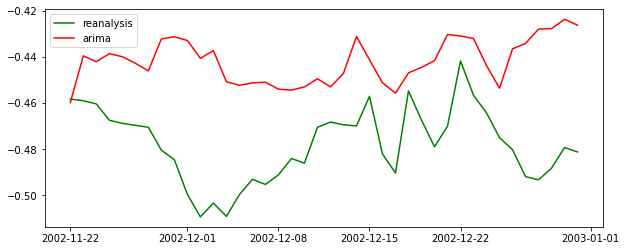

In [13]:
df_rean=pd.read_csv('C:/Users/yulas/OneDrive/Документы/ITMO/NSS_lab/FEDOT_development/FEDOT/cases/data/nemo/sea_surface_height.csv')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')

forcact_window=40

test = df_rean['sea_level'][-forcact_window:]
test.index = df_rean['dates'][-forcact_window:]
train = df_rean['sea_level'][:-forcact_window]
train.index = df_rean['dates'][:-forcact_window]

# строим модель ARIMA и делаем по ней предсказание
stlf = STLForecast(train, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
model_res = stlf.fit()
forecasts = model_res.forecast(forcact_window)

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))

plt.rcParams['figure.figsize'] = [10, 4]
plt.plot(test, c='g', label='reanalysis')
plt.plot(forecasts, c='red', label='arima')
plt.legend()
plt.show()